$$\int_{1}^{2}{\frac{1}{x}}dx$$

In [1]:
from scipy.integrate import quad
def integrand(x):
    return 1/x 

I = quad(integrand, 1, 2)
I

(0.6931471805599454, 7.695479593116622e-15)

# SciPy
## Integration (scipy.integrate)

The scipy.integrate sub-package provides several integration techniques including an ordinary differential equation integrator.

### General integration (quad)
The function quad is provided to integrate a function of one variable between two points. The points can be  ( inf) to indicate infinite limits.

For example, suppose that a numerical value for the exponential integral:
$$En(x)=\int_{1}^{\infty}{\frac{e^{-xt}}{t^n} } dt$$


In [2]:
from scipy.integrate import quad
import numpy as np
def integrand(t, n, x):
    return np.exp(-x*t) / t**n

def expint(n, x):
    return quad(integrand, 1, np.inf, args=(n, x))

vec_expint = np.vectorize(expint)

vec_expint(3, np.arange(1.0, 4.0, 0.5))

(array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
        0.00494538]),
 array([1.02561713e-08, 5.47009056e-10, 1.32960658e-10, 8.79486248e-09,
        2.18803359e-09, 6.46937584e-10]))

1.Infinite inputs are also allowed in quad by using  +/-inf as one of the arguments

2.NumPy provides is a class vectorize to convert an ordinary Python function which accepts scalars and returns scalars into a “vectorized-function” with the same broadcasting rules as other NumPy functions



In [3]:
import scipy.special as special

special.expn(3, np.arange(1.0,4.0,0.5))


array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

The functionality of the function special.expn can be replicated by defining a new function vec_expint based on the routine quad

### General multiple integration (dblquad, tplquad, nquad)
1. The mechanics for double and triple integration have been wrapped up into the functions dblquad and tplquad. 
2. The limits of all inner integrals need to be defined as functions.
3. The order of integration (and therefore the bounds) is from the innermost integral to the outermost one.

For example:$$I_n=\int_{0}^{\infty}\int_{1}^{\infty}{\frac{e^{-xt}}{t^n} } dtdx=\frac{1}{n}$$

In [10]:
from scipy.integrate import quad, dblquad
def I(n):
    return dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

print(I(4))

(0.2500000000043577, 1.29830334693681e-08)


In [11]:
print(I(5))

(0.2000000000189363, 1.3682975855986121e-08)


For n-fold integration, scipy provides the function nquad. The integration bounds are an iterable object: either a list of constant bounds, or a list of functions for the non-constant integration bounds.

In [12]:
from scipy import integrate
N = 5
def f(t, x):
   return np.exp(-x*t) / t**N

integrate.nquad(f, [[1, np.inf],[0, np.inf]])

(0.2000000000189363, 1.3682975855986121e-08)

Note that the order of arguments for f must match the order of the integration bounds; i.e., the inner integral with respect to t is on the interval [1, $\infty$]and the outer integral with respect to x is on the interval [0, $\infty$]

## Optimization (scipy.optimize)
The scipy.optimize package provides several commonly used optimization algorithms. 

### Unconstrained minimization of multivariate scalar functions (minimize)
The minimize function provides a common interface to unconstrained and constrained minimization algorithms for multivariate scalar functions in scipy.optimize. 

For example: Finding the minimum value of the function: $$f(x)=x^2+10sin(x)$$


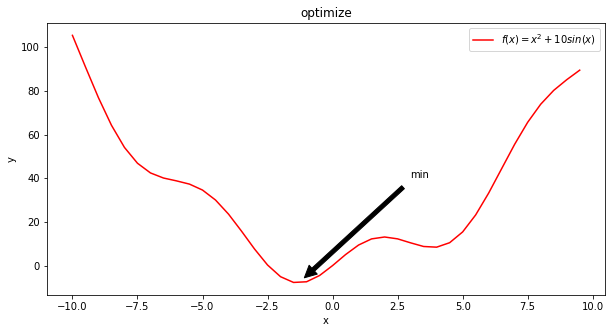

In [37]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

#Define the target function
def f(x):
    return x**2+10*np.sin(x)

#Draw a graph of the objective function
plt.figure(figsize=(10,5))
x = np.arange(-10,10,0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('optimize')
plt.plot(x,f(x),'r-',label='$f(x)=x^2+10sin(x)$')

#The lowest point in the graph
a = f(-1.3)
plt.annotate('min',xy=(-1.3,a),xytext=(3,40),arrowprops=dict(facecolor='black',shrink=0.05))
plt.legend()
plt.show()



Obviously, this is a non-convex optimization problem. For this kind of function minimization, usually a gradient descent is performed from the given initial value. BFGS algorithm is usually used for optimize

In [36]:
optimize.fmin_bfgs(f,0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

Results showed that after five iterations found a local low 7.945823, obviously this is not a function of global minimum, only a local minimum of the function, it is also a quasi-newton algorithm (BFGS) limitations, if a function has multiple local minima, quasi-newton algorithm can find the global minimum value rather than the local minimum value, which depends on the selection of initial point.If we don't know the global low point and use some neighboring points as the initial point, it will take a lot of time to get the global optimal.

A brute force search algorithm can be used to evaluate every point in the range grid

In [38]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
print(xmin_global)

[-1.30641113]


But when the domain of a function is large enough, scipy.optimize.brute( ) becomes very slow. Scipy.optimize.anneal( ) provides an ideal solution, using the simulated annealing algorithm.

We can use scipy.optimize.fminbound (function,a,b) to get the local lowest point within the specified range ([a,b])

In [40]:
optimize.fminbound (f,3,5)

3.8374672482080348

## Homework

1. Calculate the following integral: $$I_(a,b)=\int_{0}^{1}{(ax^2+b)} dx$$ 
if a=2, b=1, 2, 3, 4, 5,6 

2. To demonstrate the minimization function, consider the problem of minimizing the Rosenbrock function of N variables:
$$f(x)=\sum_{i=1}^{N-1}{100(x_{i-1}-{x_i}^2)^2+(1-x_i)^2}$$

# Thank you for watching.